In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, train_test_split

In [2]:
df = pd.read_csv('wholedata2.csv')

In [3]:
df2 = df.copy()

In [4]:
lencoder = LabelEncoder()
y = lencoder.fit_transform(df.party).reshape((-1,1))


In [5]:
np.unique(y)
df.columns

Index(['Unnamed: 0', 'district', 'state', 'abbreviation', 'state_dist', 'year',
       'laborforce_unemployed', 'PercentCar', 'PercentCarpool',
       'PercentPublicTrans', 'Management_business_science_and_arts', 'Service',
       'Sales_and_office', 'Natural_resources_construction_and_maintenance',
       'Production_transportation_and_material_moving',
       'Private_wage_and_salary_workers', 'Government_workers',
       'Less_than_10000', 'Median_household_income', 'No_health_insurance',
       'non_fam_household', 'college_enroll', 'vet_percent',
       'diff_house_1year', 'foreign_born', 'ForeignNotCit', 'ForeignCit',
       'home_lang_not_english', 'own_computer', 'total_pop', 'median_age',
       'white_pct', 'black_pct', 'amer_ind', 'asianpac', 'hispanic_pct',
       'PctU20', 'Pct20t45', 'Pct45t65', 'Pct65plus', 'U25k', 'r25k_50k',
       'r50k_100k', 'r100k_200k', 'r200kplus', 'NoHighSchool', 'HighSchoolEd',
       'SomeCollege', 'BachelorsOrHigher', 'party', 'pctDem', 'walk

In [6]:
df = df.drop(['Unnamed: 0', 'district', 'state', 'abbreviation', 'state_dist', 'year', 'pctDem', 'party'], axis = 1)
df

,laborforce_unemployed,PercentCar,PercentCarpool,PercentPublicTrans,Management_business_science_and_arts,Service,Sales_and_office,Natural_resources_construction_and_maintenance,Production_transportation_and_material_moving,Private_wage_and_salary_workers,...,U25k,r25k_50k,r50k_100k,r100k_200k,r200kplus,NoHighSchool,HighSchoolEd,SomeCollege,BachelorsOrHigher,walkedplus
0,4.7,87.3,7.2,0.4,31.5,17.2,26.8,10.0,14.5,79.5,...,29.8,25.8,28.1,13.8,2.5,13.5,32.7,30.7,23.1,1.8
1,5.2,85.1,9.0,0.4,31.6,17.3,24.9,10.4,15.7,75.2,...,30.2,27.3,27.6,12.8,2.0,16.4,32.4,29.5,21.6,2.5
2,5.2,86.3,8.4,0.4,30.8,16.3,24.4,10.0,18.5,78.3,...,31.6,27.1,27.2,12.2,2.0,16.6,33.0,30.1,20.4,2.3
3,4.1,86.1,9.6,0.3,28.1,17.1,21.8,12.1,21.0,77.8,...,33.4,26.8,27.7,10.5,1.5,19.3,35.1,29.3,16.3,1.4
4,4.6,87.2,6.9,0.4,38.4,16.1,22.5,9.1,13.8,77.2,...,25.7,24.9,27.8,17.7,3.8,14.0,26.6,29.9,29.5,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,2.0,84.8,7.1,0.3,33.1,15.8,19.7,9.5,22.0,85.1,...,18.3,23.1,34.9,19.4,4.3,7.6,33.5,33.3,25.5,3.7
1264,1.6,84.8,7.4,0.4,34.8,15.5,19.6,9.7,20.5,84.3,...,16.6,23.0,35.2,21.0,4.2,7.2,34.6,31.8,26.4,2.8
1265,2.9,76.8,11.0,1.6,32.7,18.3,20.8,15.6,12.6,73.9,...,20.6,23.5,32.0,20.6,3.3,7.5,27.4,38.6,26.6,5.8
1266,3.7,77.8,9.0,1.5,33.0,18.4,20.8,15.7,12.0,73.2,...,19.6,23.5,31.9,21.3,3.8,6.9,29.3,36.8,27.1,5.9


In [7]:
logit = linear_model.LogisticRegression(solver='liblinear')

In [8]:
X = df.loc[:, 'laborforce_unemployed': 'walkedplus']

In [9]:
Xs = scale(X) #scale data for later use

In [10]:
# Split into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Scale the data
X_scale_train = scale(X_train)
X_scale_test = scale(X_test)

In [11]:
logit.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [12]:
#grid search to find best parameters
from sklearn.model_selection import GridSearchCV
paramgrid = {
    'C' :[0.001,0.01,0.1,1,10,100,1000]
}
grid_search = GridSearchCV(estimator = logit, param_grid = paramgrid)
grid_search.fit(X_scale_train, y_train.ravel())


C:\Users\david\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [13]:
grid_search.best_params_

{'C': 1000}

In [14]:
#fit to whole model
logitC = linear_model.LogisticRegression(C=1000, solver='liblinear')
logitC.fit(Xs, y.ravel())

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
logitC.score(Xs, y.ravel())

0.9029968454258676

In [16]:
#fit to training data set
logitC.fit(X_scale_train, y_train.ravel())

# Prediction with test data
pred = logitC.predict(X_scale_test)
mean_squared_error(y_test, pred)

0.11023622047244094

In [17]:
r2_score(y_test, pred)

0.5586872586872588

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[160,  25],
       [ 17, 179]], dtype=int64)

In [19]:
import sklearn.feature_selection as fs


Optimal number of features : 21


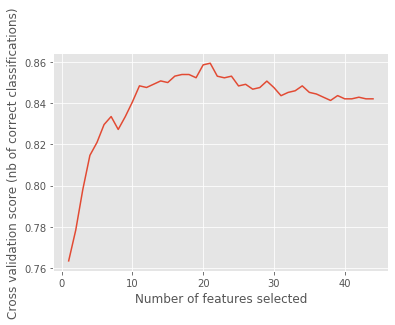

In [20]:
#Using recursive feature elimination cross validation to find optimal amount of features for classification
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(10),
              scoring='accuracy')
rfecv.fit(Xs, y.ravel())

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [21]:
rfecv.get_params()

{'cv': StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
 'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'auto_deprecated',
 'estimator__kernel': 'linear',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
     kernel='linear', max_iter=-1, probability=False, random_state=None,
     shrinking=True, tol=0.001, verbose=False),
 'min_features_to_select': 1,
 'n_jobs': None,
 'scoring': 'accuracy',
 'step': 1,
 'verbose': 0}

In [22]:
rfecv.score(Xs, y)

0.8990536277602523

In [23]:
#transform original dataset to reduced dataset
X_reduced = rfecv.transform(Xs)

In [24]:
#find important features by zipping booleans from cross validation into original dataset
bools = rfecv.get_support().tolist()
cols = np.array(df.columns).tolist()
reduced_dict = dict(zip(cols, bools))
reduced_vals = []
for key in reduced_dict:
    if reduced_dict[key] == True:
        reduced_vals.append(key)
    else: continue
reduced_vals

['laborforce_unemployed',
 'PercentCar',
 'Management_business_science_and_arts',
 'Service',
 'Production_transportation_and_material_moving',
 'Median_household_income',
 'No_health_insurance',
 'non_fam_household',
 'diff_house_1year',
 'foreign_born',
 'ForeignCit',
 'home_lang_not_english',
 'own_computer',
 'black_pct',
 'hispanic_pct',
 'Pct20t45',
 'Pct45t65',
 'Pct65plus',
 'r200kplus',
 'HighSchoolEd',
 'BachelorsOrHigher']

In [25]:
#train test split and grid search for reduced dataset
X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test = train_test_split(X_reduced, y, test_size = 0.3, random_state =1) 
from sklearn.model_selection import GridSearchCV
paramgrid = {
    'C' :[0.001,0.01,0.1,1,10,100,1000]
}
grid_search = GridSearchCV(estimator = logit, param_grid = paramgrid)
grid_search.fit(X_reduced_train, y_reduced_train.ravel())
grid_search.best_params_

C:\Users\david\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 1}

In [26]:
#fit and test reduced model
logitC1 = linear_model.LogisticRegression(C=1, solver='liblinear')
logitC1.fit(X_reduced_train, y_reduced_train.ravel())
predr = logitC1.predict(X_reduced_test)
print(mean_squared_error(y_reduced_test, predr))
r2_score(y_test, predr)

0.09186351706036745


0.6322393822393824

In [27]:
#use model to find most important values by sorting coefficient of model
import collections 
model = logitC1.fit(X_reduced_train, y_reduced_train.ravel())
coef = model.coef_.tolist()
coef = coef[0]
codict = dict(zip(coef, reduced_vals))
od = collections.OrderedDict(sorted(codict.items()))
od

OrderedDict([(-2.6589435611437646, 'home_lang_not_english'),
             (-2.272839473753328, 'Median_household_income'),
             (-1.5194616453644552, 'non_fam_household'),
             (-1.4495027145474595, 'Service'),
             (-1.2825631345024084, 'BachelorsOrHigher'),
             (-1.2613833822690919, 'black_pct'),
             (-1.2370094174187967,
              'Production_transportation_and_material_moving'),
             (-0.6380634350918494, 'Pct20t45'),
             (-0.4695069214723952, 'Pct65plus'),
             (-0.4331767424314828, 'laborforce_unemployed'),
             (-0.2719865046365126, 'Management_business_science_and_arts'),
             (-0.2559922936661192, 'hispanic_pct'),
             (-0.14292374929674856, 'Pct45t65'),
             (0.3874690777902325, 'foreign_born'),
             (0.41725405585120895, 'own_computer'),
             (0.5626475390616338, 'ForeignCit'),
             (0.6445038390369612, 'diff_house_1year'),
             (0.6717063694

In [28]:
#confusion matrix for reduced model
confusion_matrix(y_reduced_test, predr)

array([[164,  21],
       [ 14, 182]], dtype=int64)

In [29]:
#add new features to csv
df2 = df2[reduced_vals]
df2.to_csv('ReducedValuesFeatureSelection.csv')

In [47]:
#import uncontested districts 
uncontested = pd.read_csv('uncontested.csv')
df3 = uncontested.copy()
df3

,Unnamed: 0,district,state,abbreviation,state_dist,year,laborforce_unemployed,PercentCar,PercentCarpool,PercentPublicTrans,...,r50k_100k,r100k_200k,r200kplus,NoHighSchool,HighSchoolEd,SomeCollege,BachelorsOrHigher,pct_won,party,pctDem
0,272,12,Florida,FL,FL-12,2014,3.5,81.7,7.1,0.5,...,29.3,17.2,4.3,10.0,29.6,32.2,28.2,0.0,R,0.0
1,274,14,Florida,FL,FL-14,2014,5.3,78.6,8.5,2.6,...,27.5,13.3,3.3,15.3,28.8,28.9,27.0,100.0,D,100.0
2,285,25,Florida,FL,FL-25,2014,4.0,79.6,9.6,2.3,...,29.9,16.1,3.7,18.9,29.0,25.5,26.6,0.0,R,0.0
3,287,27,Florida,FL,FL-27,2014,4.9,77.7,9.0,5.4,...,24.1,13.9,7.1,20.2,28.5,22.1,29.2,0.0,R,0.0
4,324,24,Florida,FL,FL-24,2018,3.8,77.7,7.6,7.5,...,28.3,10.5,3.2,19.7,32.3,25.7,22.2,100.0,D,100.0
5,328,21,Florida,FL,FL-21,2018,3.2,77.6,10.5,1.4,...,30.1,19.8,8.2,11.7,25.1,27.4,35.7,100.0,D,100.0
6,332,10,Florida,FL,FL-10,2018,3.1,80.5,10.6,2.2,...,30.3,19.3,5.9,11.9,25.7,29.4,33.2,100.0,D,100.0
7,340,14,Florida,FL,FL-14,2018,3.5,77.3,9.8,2.0,...,27.8,18.4,8.7,11.0,26.3,25.2,37.5,100.0,D,100.0
8,344,3,Georgia,GA,GA-3,2014,5.2,82.1,11.3,0.6,...,30.5,16.1,3.4,14.4,30.8,30.2,24.5,0.0,R,0.0
9,346,5,Georgia,GA,GA-5,2014,7.2,69.2,8.9,10.0,...,24.5,14.4,6.2,12.7,22.2,24.9,40.1,100.0,D,100.0


In [31]:
#some cleaning to match logistic regression
uncontested_model = uncontested.drop(['Unnamed: 0', 'district', 'state', 'abbreviation', 'state_dist', 'year', 'pctDem', 'party', 'pct_won'], axis = 1)
uncontested_model['walkedplus'] = uncontested_model['Walked'] + uncontested_model['Other_means']

In [32]:
uncontested_model.columns

Index(['laborforce_unemployed', 'PercentCar', 'PercentCarpool',
       'PercentPublicTrans', 'Walked', 'Other_means',
       'Management_business_science_and_arts', 'Service', 'Sales_and_office',
       'Natural_resources_construction_and_maintenance',
       'Production_transportation_and_material_moving',
       'Private_wage_and_salary_workers', 'Government_workers',
       'Less_than_10000', 'Median_household_income', 'No_health_insurance',
       'non_fam_household', 'college_enroll', 'vet_percent',
       'diff_house_1year', 'foreign_born', 'ForeignNotCit', 'ForeignCit',
       'home_lang_not_english', 'own_computer', 'total_pop', 'median_age',
       'white_pct', 'black_pct', 'amer_ind', 'asianpac', 'hispanic_pct',
       'PctU20', 'Pct20t45', 'Pct45t65', 'Pct65plus', 'U25k', 'r25k_50k',
       'r50k_100k', 'r100k_200k', 'r200kplus', 'NoHighSchool', 'HighSchoolEd',
       'SomeCollege', 'BachelorsOrHigher', 'walkedplus'],
      dtype='object')

In [39]:
#extract X values
Xunc = uncontested_model.loc[:, 'laborforce_unemployed': 'walkedplus'][reduced_vals]
Xunc

,laborforce_unemployed,PercentCar,Management_business_science_and_arts,Service,Production_transportation_and_material_moving,Median_household_income,No_health_insurance,non_fam_household,diff_house_1year,foreign_born,...,home_lang_not_english,own_computer,black_pct,hispanic_pct,Pct20t45,Pct45t65,Pct65plus,r200kplus,HighSchoolEd,BachelorsOrHigher
0,3.5,81.7,39.7,17.2,7.7,50835,12.6,34.2,11.5,10.7,...,16.2,85.9,5.2,13.0,27.9,27.9,21.5,4.3,29.6,28.2
1,5.3,78.6,33.7,20.7,10.3,43758,17.7,43.7,18.6,17.8,...,30.6,84.3,25.2,29.0,37.9,25.0,12.7,3.3,28.8,27.0
2,4.0,79.6,29.0,18.6,11.5,49544,22.7,22.5,9.4,52.5,...,72.4,85.3,7.3,70.8,33.8,26.4,15.7,3.7,29.0,26.6
3,4.9,77.7,32.0,20.1,10.3,43957,21.3,31.5,9.8,55.4,...,76.6,81.1,7.2,76.1,34.8,25.9,16.4,7.1,28.5,29.2
4,3.8,77.7,25.8,26.8,12.3,42147,20.9,33.8,11.3,44.0,...,57.7,92.6,47.4,42.2,36.1,25.3,13.8,3.2,32.3,22.2
5,3.2,77.6,35.1,24.5,8.0,60316,13.7,38.7,13.1,28.2,...,37.2,94.1,15.4,25.2,28.6,25.4,25.8,8.2,25.1,35.7
6,3.1,80.5,33.3,20.4,10.8,56262,13.9,31.3,16.6,24.5,...,35.7,95.1,28.3,28.4,37.3,24.5,11.7,5.9,25.7,33.2
7,3.5,77.3,40.2,18.7,9.3,55729,13.2,42.1,20.0,21.8,...,34.2,94.8,18.0,31.9,37.4,24.6,13.4,8.7,26.3,37.5
8,5.2,82.1,32.0,17.5,15.4,49833,13.4,28.8,15.7,5.2,...,7.0,84.5,24.4,5.2,32.5,25.8,13.7,3.4,30.8,24.5
9,7.2,69.2,46.7,15.9,10.1,44411,16.9,52.7,21.3,8.6,...,12.8,84.6,58.1,6.6,42.5,22.7,10.5,6.2,22.2,40.1


In [34]:
#grid search for entire data set
from sklearn.model_selection import GridSearchCV
paramgrid = {
    'C' :[0.001,0.01,0.1,1,10,100,1000]
}
grid_search = GridSearchCV(estimator = logit, param_grid = paramgrid)
grid_search.fit(scale(X_reduced), y.ravel())
grid_search.best_params_

C:\Users\david\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 1}

In [35]:
#train the model using the entire data set and then use to predict uncontested districts
logitC3 = linear_model.LogisticRegression(C=1, solver='liblinear')
logitC3.fit(scale(X_reduced), y.ravel())
pred3 = logitC3.predict(scale(Xunc))
pred3

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [36]:
#predictions made by model
predictions = pd.DataFrame(pred3, columns = ['predictedParty'])

In [37]:
#original uncontested results
unc = np.array(df3['party'])
uncontested_results = pd.DataFrame(unc, columns = ['Uncontested Results'])

In [41]:
# compare results to original outcomes 1 is Republican
parties = pd.concat([uncontested_results, predictions], axis = 1)

In [45]:
#concat with features
totalunc = pd.concat([parties, Xunc], axis = 1)

In [50]:
#set index to match original dataset
totalunc.set_index(df3['Unnamed: 0'])

,Uncontested Results,predictedParty,laborforce_unemployed,PercentCar,Management_business_science_and_arts,Service,Production_transportation_and_material_moving,Median_household_income,No_health_insurance,non_fam_household,...,home_lang_not_english,own_computer,black_pct,hispanic_pct,Pct20t45,Pct45t65,Pct65plus,r200kplus,HighSchoolEd,BachelorsOrHigher
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
272,R,1,3.5,81.7,39.7,17.2,7.7,50835,12.6,34.2,...,16.2,85.9,5.2,13.0,27.9,27.9,21.5,4.3,29.6,28.2
274,D,0,5.3,78.6,33.7,20.7,10.3,43758,17.7,43.7,...,30.6,84.3,25.2,29.0,37.9,25.0,12.7,3.3,28.8,27.0
285,R,1,4.0,79.6,29.0,18.6,11.5,49544,22.7,22.5,...,72.4,85.3,7.3,70.8,33.8,26.4,15.7,3.7,29.0,26.6
287,R,0,4.9,77.7,32.0,20.1,10.3,43957,21.3,31.5,...,76.6,81.1,7.2,76.1,34.8,25.9,16.4,7.1,28.5,29.2
324,D,0,3.8,77.7,25.8,26.8,12.3,42147,20.9,33.8,...,57.7,92.6,47.4,42.2,36.1,25.3,13.8,3.2,32.3,22.2
328,D,0,3.2,77.6,35.1,24.5,8.0,60316,13.7,38.7,...,37.2,94.1,15.4,25.2,28.6,25.4,25.8,8.2,25.1,35.7
332,D,0,3.1,80.5,33.3,20.4,10.8,56262,13.9,31.3,...,35.7,95.1,28.3,28.4,37.3,24.5,11.7,5.9,25.7,33.2
340,D,0,3.5,77.3,40.2,18.7,9.3,55729,13.2,42.1,...,34.2,94.8,18.0,31.9,37.4,24.6,13.4,8.7,26.3,37.5
344,R,1,5.2,82.1,32.0,17.5,15.4,49833,13.4,28.8,...,7.0,84.5,24.4,5.2,32.5,25.8,13.7,3.4,30.8,24.5
